# Image Classification using RestNet 18

Connect the google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install console_progressbar

  Created wheel for console-progressbar: filename=console_progressbar-1.1.2-cp36-none-any.whl size=4140 sha256=38916a9ff803a069a2b6af78274aff2112d963fc18fd2b563eee6c41d94ec05e
  Stored in directory: /root/.cache/pip/wheels/35/48/4c/dfcbbd70b7a1690c7113e01fa2201a809203078d96de82b900
Successfully built console-progressbar


In [28]:

import tarfile
import scipy.io
import numpy as np
import os
import cv2 as cv
import shutil
import random
from console_progressbar import ProgressBar

In [29]:
def ensure_folder(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
        
def save_train_data(fnames, labels, bboxes):
    src_folder ='/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/train1'
    num_samples = len(fnames)

    train_split = 0.8
    num_train = int(round(num_samples * train_split))
    train_indexes = random.sample(range(num_samples), num_train)

    pb = ProgressBar(total=100, prefix='Save train data', suffix='', decimals=3, length=50, fill='=')

    for i in range(num_samples):
        fname = fnames[i]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]

        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print("{} -> {}".format(fname, label))
        pb.print_progress_bar((i + 1) * 100 / num_samples)

        if i in train_indexes:
            dst_folder = '/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data/train'
        else:
            dst_folder = '/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data/valid'

        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)

        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)

In [30]:
def save_test_data(fnames, bboxes):
    src_folder = '/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/val2'
    dst_folder = '/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data/test'
    num_samples = len(fnames)

    pb = ProgressBar(total=100, prefix='Save test data', suffix='', decimals=3, length=50, fill='=')

    for i in range(num_samples):
        fname = fnames[i]
        (x1, y1, x2, y2) = bboxes[i]
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print(fname)
        pb.print_progress_bar((i + 1) * 100 / num_samples)

        dst_path = os.path.join(dst_folder, fname)
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)

In [6]:
def process_train_data():
    print("Processing train data...")
    cars_annos = scipy.io.loadmat('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/devkit/cars_train_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    class_ids = []
    bboxes = []
    labels = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = annotation[0][4][0][0]
        labels.append('%04d' % (class_id,))
        fname = annotation[0][5][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)

    labels_count = np.unique(class_ids).shape[0]
    print(np.unique(class_ids))
    print('The number of different cars is %d' % labels_count)

    save_train_data(fnames, labels, bboxes)

In [31]:
def process_test_data():
    print("Processing test data...")
    cars_annos = scipy.io.loadmat('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/devkit/cars_test_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    bboxes = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        fname = annotation[0][4][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        fnames.append(fname)

    save_test_data(fnames, bboxes)

In [ ]:
img_width, img_height = 224, 224

cars_meta = scipy.io.loadmat('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/devkit/cars_meta.mat')
class_names = cars_meta['class_names']  # shape=(1, 196)
class_names = np.transpose(class_names)
print('class_names.shape: ' + str(class_names.shape))
print('Sample class_name: [{}]'.format(class_names[8][0][0]))

ensure_folder('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data/train')
ensure_folder('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data/valid')
ensure_folder('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data/test')

process_train_data()
process_test_data()

class_names.shape: (196, 1)
Sample class_name: [Aston Martin V8 Vantage Coupe 2012]
Processing train data...
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196]
The number of different cars is 196


In [32]:
import torchvision
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *
import cv2 as cv
import numpy as np
import pandas as pd
import scipy.io as sio

In [2]:
tfms = get_transforms(do_flip=True, flip_vert=False, max_lighting=0.1, max_zoom=1.05,
                      max_warp=0.,
                      xtra_tfms=[rand_crop(), rand_zoom(1, 1.5),
                                 symmetric_warp(magnitude=(-0.2, 0.2))])

data = ImageDataBunch.from_folder('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data','train','valid',
                                  ds_tfms=tfms
                                  ,size=128,bs=64).normalize(imagenet_stats)

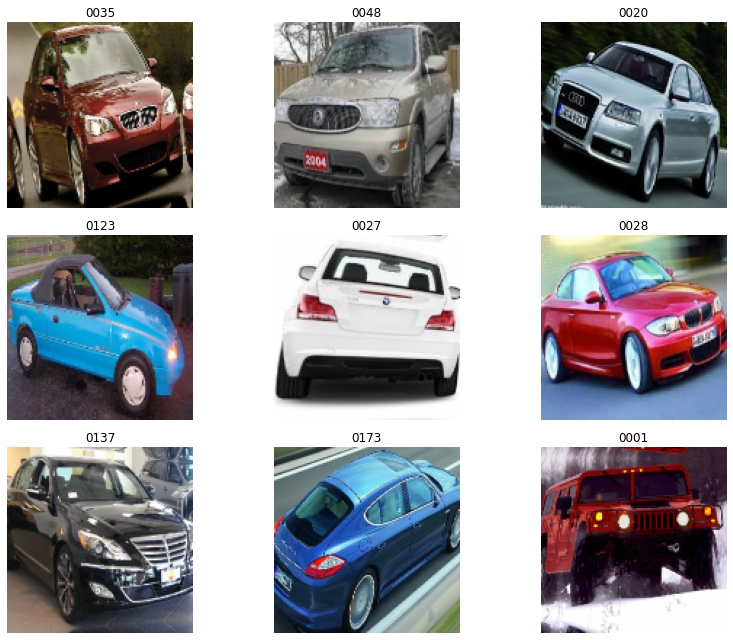

In [3]:
data.show_batch(rows=3, figsize=(12,9))

In [5]:
# class names and number of classes
# print(data.classes)
len(data.classes),data.c

(196, 196)

In [6]:
!pip install pretrainedmodels
import pretrainedmodels

     |████████████████████████████████| 61kB 5.5MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=42e762862fa82453a54309b5e7e16cacd265443acfc203025ed0d3e5b64e854a
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [33]:
from torch import nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1., gamma=2.):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets, **kwargs):
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
        return F_loss.mean()

In [8]:
def resnet18(pretrained=False):
    pretrained = 'imagenet' if pretrained else None
    model = pretrainedmodels.resnet18(pretrained=pretrained)
    return nn.Sequential(*list(model.children()))

## Training the Model

In [9]:
learn = cnn_learner(data, resnet18, pretrained=True, cut=-2,
                    split_on=lambda m: (m[0][3], m[1]), 
                    metrics=[accuracy])
learn.loss_fn = FocalLoss()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-02
Min loss divided by 10: 4.79E-03


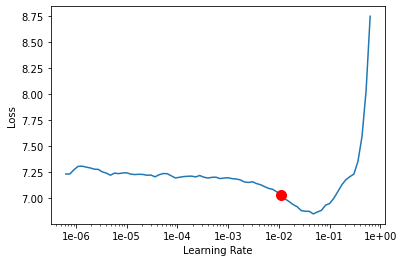

In [10]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [12]:
learn.fit_one_cycle(15, max_lr=slice(2e-2), wd=1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.791216,1.630890,0.607735,00:27
1,0.879029,1.749408,0.587477,00:27
2,1.187616,1.940398,0.545120,00:27
3,1.538927,2.143853,0.518723,00:27
4,1.705082,2.089609,0.518723,00:27
5,1.738252,2.139947,0.510743,00:27
6,1.624827,1.984804,0.533456,00:27
7,1.567245,1.977758,0.535298,00:27
8,1.378707,1.873877,0.572130,00:27
9,1.256415,1.760352,0.581952,00:27


In [18]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [19]:
learn.save('resnet18_01');
learn.unfreeze();
learn = learn.clip_grad();

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.10E-05


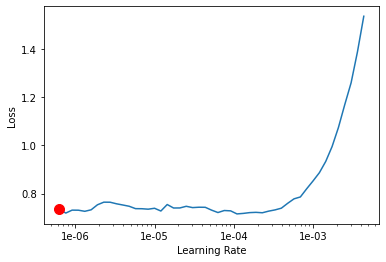

In [20]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [21]:
learn.load('resnet18_01');
learn.unfreeze();
learn = learn.clip_grad();

In [22]:
lr = [3e-3/100, 3e-3/20, 3e-3/10]
learn.fit_one_cycle(15, lr, wd=1e-7)


epoch,train_loss,valid_loss,accuracy,time
0,0.783739,1.605916,0.617557,00:28
1,0.773213,1.608481,0.622468,00:28
2,0.833212,1.576319,0.626151,00:28
3,0.865806,1.710971,0.604052,00:28
4,0.866265,1.560736,0.616329,00:28
5,0.770602,1.499826,0.635359,00:28
6,0.674160,1.314607,0.664825,00:28
7,0.594020,1.334154,0.665439,00:29
8,0.475263,1.189808,0.702885,00:28
9,0.393261,1.117545,0.718232,00:28


In [23]:
learn.save('resnet_18_02');

## Progressive Resizing

### At Size 224

In [25]:
SZ = 224
cutout_frac = 0.20
p_cutout = 0.75
cutout_sz = round(SZ*cutout_frac)
cutout_tfm = cutout(n_holes=(1,1), length=(cutout_sz, cutout_sz), p=p_cutout)

tfms = get_transforms(do_flip=True, max_rotate=15, flip_vert=False, max_lighting=0.1,
                      max_zoom=1.05, max_warp=0.,
                      xtra_tfms=[rand_crop(), rand_zoom(1, 1.5),
                                 symmetric_warp(magnitude=(-0.2, 0.2)), cutout_tfm])

In [26]:
data = ImageDataBunch.from_folder('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data','train','valid',
                                  ds_tfms=tfms
                                  ,size=224,bs=32).normalize(imagenet_stats)

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 224, 224])

In [27]:
learn.load('resnet_18_02');
learn.freeze();
learn = learn.clip_grad();

In [28]:
learn.loss_func = FocalLoss()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 2.75E-03


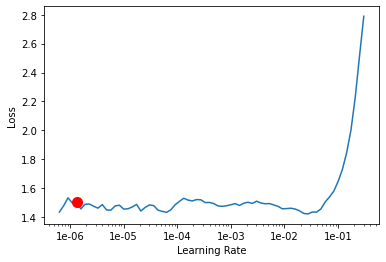

In [29]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [30]:
learn.fit_one_cycle(15, slice(3e-3), wd=5e-6)

epoch,train_loss,valid_loss,accuracy,time
0,1.514448,1.733299,0.558625,00:42
1,1.248325,1.451499,0.584408,00:42
2,0.959851,1.189231,0.621854,00:42
3,0.842299,0.983761,0.677103,00:42
4,0.679821,0.906936,0.701044,00:42
5,0.605274,0.874476,0.707796,00:42
6,0.520640,0.862686,0.715777,00:42
7,0.506325,0.837487,0.721301,00:42
8,0.489134,0.792456,0.736648,00:42
9,0.417048,0.780581,0.738490,00:42


In [31]:
learn.save('resnet_18_03');
learn.load('resnet_18_03');

In [32]:
learn.unfreeze();
learn = learn.clip_grad();

In [33]:
lr = [1e-3/200, 1e-3/20, 1e-3/10]
learn.fit_one_cycle(15, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.356129,0.767440,0.740331,00:43
1,0.345729,0.721976,0.753837,00:43
2,0.355267,0.719067,0.763045,00:43
3,0.319103,0.723886,0.752609,00:44
4,0.309275,0.737059,0.745856,00:43
5,0.289691,0.641801,0.775936,00:43
6,0.249392,0.651789,0.779619,00:43
7,0.210511,0.627581,0.785144,00:43
8,0.183763,0.620549,0.783917,00:43
9,0.148730,0.594209,0.796194,00:43


In [34]:
learn.save('resnet_18_04');
learn.load('resnet_18_04');

### At Size 299

In [35]:
SZ = 299
cutout_frac = 0.20
p_cutout = 0.75
cutout_sz = round(SZ*cutout_frac)
cutout_tfm = cutout(n_holes=(1,1), length=(cutout_sz, cutout_sz), p=p_cutout)

In [36]:
tfms = get_transforms(do_flip=True, max_rotate=15, flip_vert=False, max_lighting=0.1,
                      max_zoom=1.05, max_warp=0.,
                      xtra_tfms=[rand_crop(),
                                 symmetric_warp(magnitude=(-0.2, 0.2)), cutout_tfm])

In [37]:
data = ImageDataBunch.from_folder('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data','train','valid',
                                  ds_tfms=tfms
                                  ,size=SZ,bs=24).normalize(imagenet_stats)

learn.data = data

In [38]:
learn.load('resnet_18_04');
learn.freeze();
learn = learn.clip_grad();
learn.mixup();

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-05
Min loss divided by 10: 6.31E-08


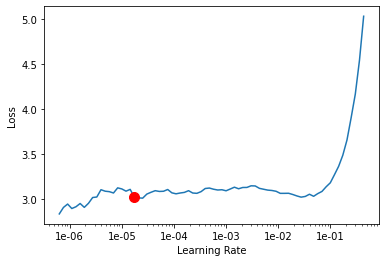

In [39]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [40]:
learn.fit_one_cycle(15, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.335773,0.724523,0.766114,01:03
1,2.212938,0.710457,0.775322,01:02
2,2.330882,0.740903,0.751381,01:02
3,2.304416,0.721534,0.758748,01:01
4,2.282605,0.778386,0.740331,01:02
5,2.316917,0.712621,0.771639,01:02
6,2.281826,0.696427,0.763045,01:02
7,2.176039,0.662269,0.785758,01:03
8,2.109547,0.625509,0.798036,01:03
9,2.004725,0.605310,0.812155,01:03


In [41]:
learn.save('resnet_18_05');

In [42]:
learn.load('resnet_18_05');

In [43]:
learn.unfreeze();
learn = learn.clip_grad();
# learn.mixup();

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-06
Min loss divided by 10: 6.31E-08


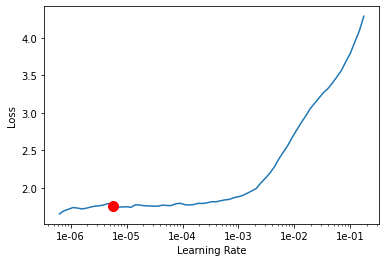

In [44]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [45]:
lr = [2e-5, 2e-4, 2e-3]
learn.fit_one_cycle(15, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.864269,0.578706,0.821363,01:04
1,1.887000,0.646808,0.802947,01:07
2,2.064442,0.757299,0.761203,01:04
3,2.093053,0.771995,0.734807,01:04
4,2.122253,0.799387,0.732965,01:04
5,2.029344,0.647091,0.790669,01:04
6,2.010798,0.577118,0.820135,01:04
7,1.849021,0.519222,0.841621,01:04
8,1.801269,0.529768,0.835482,01:04
9,1.733787,0.458778,0.864334,01:04


In [46]:
learn.export('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data/resnet.pkl');

## Predicting on the test set

In [16]:
test= download_data(url='http://imagenet.stanford.edu/internal/car196/cars_test_annos_withlabels', ext=".mat")

In [18]:
print(test)

/root/.fastai/data/cars_test_annos_withlabels.mat


In [19]:
labels = sio.loadmat('/root/.fastai/data/cars_test_annos_withlabels.mat')

In [21]:
print(labels)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013', '__version__': '1.0', '__globals__': [], 'annotations': array([[(array([[30]], dtype=uint8), array([[52]], dtype=uint8), array([[246]], dtype=uint8), array([[147]], dtype=uint8), array([[181]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
        (array([[100]], dtype=uint8), array([[19]], dtype=uint8), array([[576]], dtype=uint16), array([[203]], dtype=uint8), array([[103]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
        (array([[51]], dtype=uint8), array([[105]], dtype=uint8), array([[968]], dtype=uint16), array([[659]], dtype=uint16), array([[145]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
        (array([[67]], dtype=uint8), array([[84]], dtype=uint8), array([[581]], dtype=uint16), array([[407]], dtype=uint16), array([[187]], dtype=uint8), array(['00004.jpg'], dtype='<U9')),
        ...,
        (array([[23]], dtype=uint8), array([[18]], dtype=uint8), array([[640

In [22]:
x = []
for i in range(8041):
    x.append(np.transpose(np.array(labels['annotations']['fname']))[i][0][0])

In [26]:
df=pd.DataFrame(data=np.transpose(np.array(labels['annotations']['class'],dtype=np.int)),
                  index=x)

df.to_csv('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data/test//test_labels.csv')

In [52]:
learn = load_learner('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data','resnet.pkl', test= 
                     ImageList.from_csv('/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data','test_labels.csv',folder='test'))
preds,y = learn.TTA(ds_type=DatasetType.Test)

In [36]:
a=preds;a.shape

torch.Size([8041, 196])

In [37]:
b=np.array(labels['annotations']['class'],dtype=np.int)-1;b.shape 
b = torch.from_numpy(b)

In [38]:
acc=accuracy(a,b);acc

tensor(0.8785)

In [55]:
img = open_image("/content/drive/MyDrive/STUDY/zalak_fellowship/stanford-cars/data/test/00039.jpg").resize(299)
learn.predict(img)

(Category tensor(29),
 tensor(29),
 tensor([2.7690, 3.5821, 2.7540, 4.6240, 3.7272, 4.4520, 2.9013, 2.0124, 2.0716,
         1.6904, 2.5211, 2.8653, 3.4521, 1.0503, 2.5845, 4.0479, 2.7295, 4.6700,
         1.2367, 4.3993, 5.0308, 5.2008, 4.0953, 3.7533, 1.7331, 6.6301, 3.7313,
         4.7881, 7.8271, 9.6179, 5.9074, 4.9915, 3.9609, 6.9264, 7.6427, 7.6056,
         5.3898, 4.8545, 2.9711, 4.9302, 4.0658, 2.1387, 4.0340, 5.0816, 1.9588,
         2.0011, 4.2061, 3.6261, 3.9656, 3.7948, 3.9788, 3.2881, 2.5792, 1.6341,
         2.7677, 3.3631, 2.4982, 2.5953, 2.9684, 3.2609, 2.4777, 2.9795, 2.8233,
         2.5681, 2.4942, 3.1275, 2.9854, 3.5128, 1.1604, 2.2820, 2.6599, 2.7095,
         3.7108, 3.1374, 1.9216, 3.7078, 5.8398, 3.4438, 5.0094, 3.2855, 3.3522,
         4.1107, 2.3793, 1.2831, 3.7466, 3.0336, 3.3902, 1.8347, 3.9828, 4.7665,
         4.1398, 4.3300, 2.7732, 4.5995, 3.1945, 3.3195, 3.4786, 2.8141, 2.3387,
         2.9375, 3.7464, 1.3522, 0.8060, 1.5376, 2.9826, 3.3523, 2.9876, 3

In [39]:
pd.DataFrame(preds.cpu().numpy()).to_csv('test_probs.csv',index=False)

In [40]:
labelled_preds = torch.argmax(preds,1).cpu().numpy()
out = open('result.txt', 'a')
for val in labelled_preds:
    out.write('{}\n'.format(str(val+1)))
out.close()

In [45]:

result= pd.read_csv("/content/test_probs.csv")
result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195
0,-0.177230,1.178507,0.066225,1.115692,2.942324,0.234921,-0.426662,1.325037,0.272608,-0.790848,-1.733078,-0.948484,0.685364,1.146156,1.156143,0.739740,1.981122,1.912236,0.141384,1.248555,-1.008622,0.532703,0.954017,0.810590,0.909947,0.063736,0.354026,0.710999,1.318490,0.928302,1.997631,0.695435,1.158852,2.365578,0.959372,-0.150707,-0.354470,-0.979925,0.382313,-0.151234,...,1.242603,1.092707,-0.055808,-0.847750,1.565161,3.802276,1.596142,2.519572,2.136153,0.578963,1.922716,0.439445,-1.078199,-1.459027,3.159679,1.398983,-0.041752,1.114154,0.567425,-0.328895,1.133214,1.775992,0.094832,0.176223,6.146567,1.664595,2.141439,0.677655,-0.117679,-0.741765,0.835742,2.404899,0.233130,3.667151,0.353818,0.766779,0.819930,0.604549,0.593703,0.563162
1,0.000407,-1.697079,-1.510806,-0.625544,-0.201074,1.943261,0.371443,1.741084,0.528238,0.867994,1.280132,0.839548,-0.683237,-1.266214,0.063961,0.164660,-0.684584,0.172439,-1.297312,-0.423370,1.692118,0.541983,1.712754,0.955064,2.240819,-1.230531,1.083429,-0.998285,0.458312,-1.058920,-1.484783,-1.225859,0.566896,1.146304,0.553993,1.946284,-1.005758,0.423407,0.499521,-0.531989,...,-0.200672,-0.578474,-0.642791,1.540533,1.824616,0.639219,-0.043378,1.013566,0.824818,0.410897,0.820201,1.430426,0.227774,1.562976,2.010554,-0.024041,0.693548,-0.055994,-0.434075,-0.964386,-1.027899,-0.286975,0.987364,2.029464,-0.030851,0.088439,1.757091,0.177898,1.033863,-1.064595,1.032375,1.456008,-0.842752,-0.190255,-0.330179,0.299811,2.429936,-1.088687,-0.724562,3.110847
2,3.120398,0.001203,0.340127,1.012513,1.362327,1.703350,0.666378,1.715167,0.171981,1.733855,1.216706,2.417637,0.059132,0.157873,0.622345,1.372904,0.804255,2.924833,-0.133266,2.530998,2.630441,1.377999,1.670423,1.764595,0.282270,0.640653,2.492514,1.176494,1.542717,3.460061,1.639742,2.082113,1.244854,1.359780,1.616519,1.454106,1.152247,1.375142,2.562235,2.714249,...,0.711547,0.554704,2.349002,0.056297,1.926095,1.693362,0.560113,2.760909,1.221540,1.411105,0.365816,0.384999,2.647043,0.444239,1.187179,1.173952,1.507607,0.667092,1.171685,1.304740,1.900063,1.822844,1.238289,1.592039,1.057134,2.400832,2.541420,1.874423,0.666206,0.957889,1.131431,0.834648,2.317673,1.001262,3.697008,1.026891,1.610142,2.952290,3.222863,1.648401
3,0.014701,1.440363,2.076001,0.539476,2.855548,-0.458118,2.684935,-0.726372,-0.256523,0.276824,0.595586,-0.664089,0.466568,-0.282257,-0.610149,-0.679947,-0.885157,0.028365,-0.772436,-0.239288,1.161842,0.742593,-0.384842,-0.615813,-0.374022,-0.738236,-1.279713,-0.586310,0.060743,0.983112,0.214238,-1.775615,-1.010245,-1.829252,0.169439,-0.058451,-0.659484,-0.578853,-0.922452,-1.643704,...,-0.968576,-1.326930,-0.171889,0.943375,0.364239,-0.051119,-0.816907,-1.020659,-2.374984,-0.141047,1.168226,2.095745,1.178286,0.733507,0.194171,-0.363125,0.409177,1.109621,-1.129894,-1.193281,-0.566995,1.496654,-0.678546,0.186555,-0.357080,0.840172,0.075602,1.439706,-0.194235,-0.237903,5.817841,3.988046,1.407462,1.585101,-0.715874,-0.632355,0.455012,0.730083,-1.309542,-0.099843
4,-0.244138,0.189902,1.198049,-0.088622,1.698984,-0.877952,1.159372,2.727178,3.493709,2.536163,1.864945,-0.023352,1.472491,1.905097,1.676560,0.216968,0.146937,-0.453574,1.007065,1.057081,0.198920,0.889139,0.469466,0.073133,0.320420,0.329465,0.814791,0.947249,0.871864,-0.121972,1.737498,-0.215276,0.855451,0.635078,1.860864,0.917110,0.888828,2.070754,1.890751,-0.857174,...,0.978315,1.421413,-0.057297,2.326683,-0.224113,1.784020,1.984898,0.020362,1.702891,1.705788,1.245201,1.054622,0.494923,0.594245,-0.066938,-0.127301,1.788781,0.814078,-0.997216,-1.277907,0.370077,-0.993096,0.247728,1.033069,0.809280,1.667612,-0.498613,0.788061,6.480053,0.119309,0.878934,-0.538539,-0.368462,3.171149,-0.038988,0.730326,2.026343,-0.4775

In [46]:
result.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195
8036,1.514441,1.978701,0.293137,0.357204,2.821142,-1.026356,2.465957,0.274348,-0.033466,-0.867881,-0.751695,-0.085675,1.966832,1.965520,1.183371,-0.384127,0.702758,0.003112,0.217330,-0.084957,0.092590,2.650781,1.195220,-0.655185,1.527532,0.471799,2.669830,2.295491,0.448699,2.104874,0.533008,2.001150,4.236093,1.778975,2.315489,-0.170026,0.538300,-0.596474,0.256483,0.398437,...,1.982750,-0.275336,1.311310,-0.163614,0.585917,1.108150,0.307551,3.252240,0.763207,1.275502,2.854584,1.880221,1.972428,2.909408,0.023549,1.293308,0.500643,0.667820,-0.759277,0.450305,0.273004,2.682713,0.360187,0.244930,2.157587,2.669995,2.078159,0.488551,0.102269,0.171256,0.972091,0.292085,1.240012,0.951253,0.452037,3.079259,1.998801,-0.887253,1.042767,3.062285
8037,-1.192590,-2.749939,-2.937249,-1.865603,-1.699396,1.547448,-1.415043,-0.763229,-0.864742,-1.457026,-0.614126,-1.383522,-0.890635,-1.542740,-0.040485,3.862556,1.781057,3.006113,0.103779,0.084940,-1.360731,-0.363694,-1.178438,-0.352363,-0.592880,-1.822169,-1.048949,0.104352,-0.367897,-0.561911,-0.557327,-1.015945,-1.149164,-0.402083,-1.614044,-0.031773,-1.601246,-1.012142,-0.621482,-0.391709,...,-0.442236,-0.954153,-1.578793,-0.563738,0.082939,-2.011878,-1.470941,-2.022383,-1.163755,-1.052294,0.105030,-2.662394,-1.080147,-0.471539,3.376958,0.326962,-1.331422,-1.731178,-2.751352,-2.568413,-0.839896,-2.404094,-2.085560,-0.904262,-1.123555,-1.515455,-2.911229,-1.826032,-1.987055,-2.209542,-0.417865,0.000049,-2.184356,-0.588221,1.975499,-1.832702,-1.154507,0.633052,-0.066298,-2.152740
8038,0.896033,1.726768,0.777529,0.373436,1.190484,3.311673,1.380972,1.484343,0.015605,0.926367,1.493675,4.367787,4.124608,1.264300,1.942676,6.895914,7.926889,6.525946,2.815860,3.927423,3.295119,3.095087,1.519028,2.635250,2.468446,0.561702,2.426073,3.307771,0.387136,1.770025,1.228620,0.594207,1.538934,1.327685,1.443346,2.374901,0.472613,0.719661,2.175139,3.081984,...,0.973180,1.181114,1.778256,2.285351,5.159572,1.483339,1.245703,2.267251,1.795701,1.753483,1.699711,0.307709,1.930257,2.204287,4.898163,2.626277,0.607085,1.419123,-0.113923,0.631919,0.605706,0.457708,0.118741,0.887449,1.225147,1.837077,2.059841,1.998565,0.865925,0.727340,1.807555,1.828447,0.736166,2.158944,3.887476,0.806578,0.978792,2.719150,3.032632,0.811606
8039,0.209949,0.384653,1.185655,-0.420670,1.446765,0.730611,1.054212,0.493321,1.819225,1.716636,2.580542,-0.690643,-0.061590,0.865056,1.336154,-0.716075,-0.713746,0.063093,1.654463,-0.204179,1.715429,1.805610,0.451050,-0.478073,1.221582,1.225153,2.619448,2.613021,3.199583,3.502805,4.319115,1.828297,3.150345,4.130323,3.130059,5.395189,4.175837,7.231153,1.957734,-1.818676,...,2.050287,1.729305,0.680572,1.347940,1.061150,-0.228341,1.026792,0.331396,-0.714338,0.504555,1.402038,-0.162404,0.343852,0.682537,0.815518,-0.323248,0.415064,0.811750,0.802643,-0.254386,-0.385436,-0.390536,-0.681150,1.971200,-0.333862,-0.015030,0.181876,0.516693,2.391364,-0.091739,-0.527633,0.782989,0.794143,-0.017391,-1.810160,-1.072604,1.116414,-0.324800,0.319903,-0.058701
8040,0.605135,0.499666,1.442034,0.951436,1.077322,2.814012,2.859431,1.500373,2.365734,0.602643,1.652305,1.418555,2.988027,1.840780,0.757805,1.965626,1.492583,1.463334,2.293544,2.091685,1.641799,3.003130,2.285908,1.933146,1.336496,4.918298,3.774743,5.285680,4.399823,4.970322,2.752489,8.373586,8.092770,5.214728,3.947337,3.494129,6.133065,3.973664,3.334238,2.188756,...,2.745023,1.867842,3.317653,1.134022,1.054737,2.404721,1.754446,1.314269,2.449532,2.387154,2.713730,1.017150,2.201732,1.862078,2.244103,1.797593,2.162161,1.606674,0.570734,1.973929,1.429944,1.655472,0.690437,0.506128,0.674958,1.260561,2.158850,1.091402,2.403606,2.013261,-0.488443,1.177192,2.219312,3.408356,1.743706,2.223821,3.396969,